In [1]:
# Mengimpor library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Mengimpor dataset
dataset = pd.read_csv('Data_bank_churn.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

# Mengonversi data kategori jenis kelamin menjadi numerik
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder = LabelEncoder()
X[:, 2] = labelencoder.fit_transform(X[:, 2])
# Membuat dummy variable untuk kolom negara
# apa itu dummy variabel? baca di penjelasan
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(columnTransformer.fit_transform(X), dtype = float)
# Menghilangkan 1 dummy variabel di kolom negara
X = X[:, 1:]

In [3]:
# Membagi data ke test dan training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [4]:
# Mengimpor library Keras dan turunannya
# Sekarang menggunakan TensorFlow 2.0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Inisialisasi ANN
MesinKlasifikasi = Sequential()
# Menambah input layer dan hidden layer pertama
MesinKlasifikasi.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
# Menambah hidden layer kedua
MesinKlasifikasi.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
# Menambah output layer
MesinKlasifikasi.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# Meenjalankan ANN
MesinKlasifikasi.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fitting ANN ke training set
MesinKlasifikasi.fit(X_train, y_train, batch_size = 10, epochs = 100)
# Memprediksi hasil test set
y_pred = MesinKlasifikasi.predict(X_test)
y_pred = (y_pred > 0.5)

2024-04-16 21:48:23.375654: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-16 21:48:24.101133: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-16 21:48:24.101186: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-16 21:48:24.101252: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-16 21:48:24.295725: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-16 21:48:24.296525: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

Epoch 1/100
800/800 [==============================] - 3s 2ms/step - loss: 0.4799 - accuracy: 0.7958
Epoch 2/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4175 - accuracy: 0.8175
Epoch 3/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4040 - accuracy: 0.8251
Epoch 4/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3925 - accuracy: 0.8266
Epoch 5/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3842 - accuracy: 0.8314
Epoch 6/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3782 - accuracy: 0.8315
Epoch 7/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3735 - accuracy: 0.8430
Epoch 8/100
800/800 [==============================] - 3s 3ms/step - loss: 0.3694 - accuracy: 0.8455
Epoch 9/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3662 - accuracy: 0.8504
Epoch 10/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3634 - accura

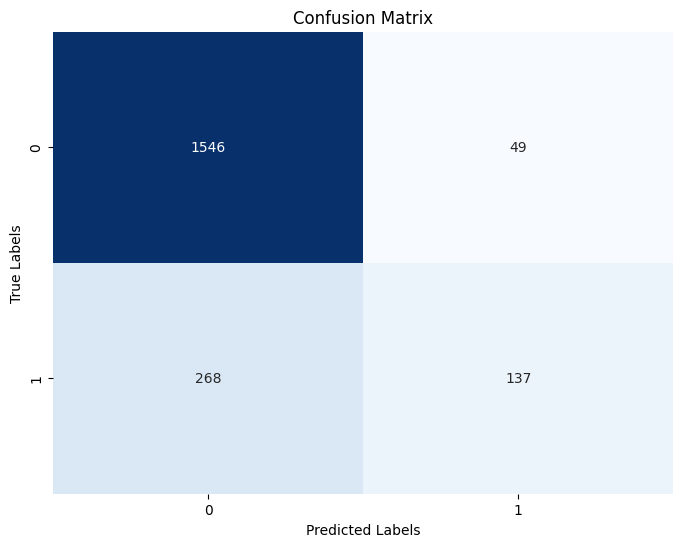

In [16]:
# Membuat confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()